In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('drug200.csv')
data.shape

(200, 6)

In [3]:
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [4]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Sex'])
data['Sex'] = labelEncoder.transform(data['Sex'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['BP'])
data['BP'] = labelEncoder.transform(data['BP'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Cholesterol'])
data['Cholesterol'] = labelEncoder.transform(data['Cholesterol'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Drug'])
data['Drug'] = labelEncoder.transform(data['Drug'])

data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [5]:
data_novo = data.iloc[:, 1:5].values
data_novo = StandardScaler().fit_transform(data_novo)
data_novo

array([[-1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [-1.040833  ,  0.10979693, -0.97043679,  0.27179427],
       [-1.040833  ,  1.32976279, -0.97043679, -1.03769314],
       [-1.040833  ,  1.32976279, -0.97043679,  0.02643885],
       [ 0.96076892,  0.10979693, -0.97043679, -0.70046821],
       [ 0.96076892,  1.32976279, -0.97043679, -0.12676951],
       [ 0.96076892,  0.10979693,  1.03046381,  0.45567206],
       [-1.040833  ,  0.10979693, -0.97043679, -0.59916196],
       [-1.040833  , -1.11016894,  1.03046381,  0.43221897],
       [ 0.96076892,  0.10979693, -0.97043679, -0.09832049],
       [-1.040833  ,  0.10979693, -0.97043679,  0.674105  ],
       [-1.040833  ,  1.32976279, -0.97043679, -0.46926791],
       [-1.040833  , -1.11016894,  1.03046381, -0.0788919 ],
       [ 0.96076892,  0.

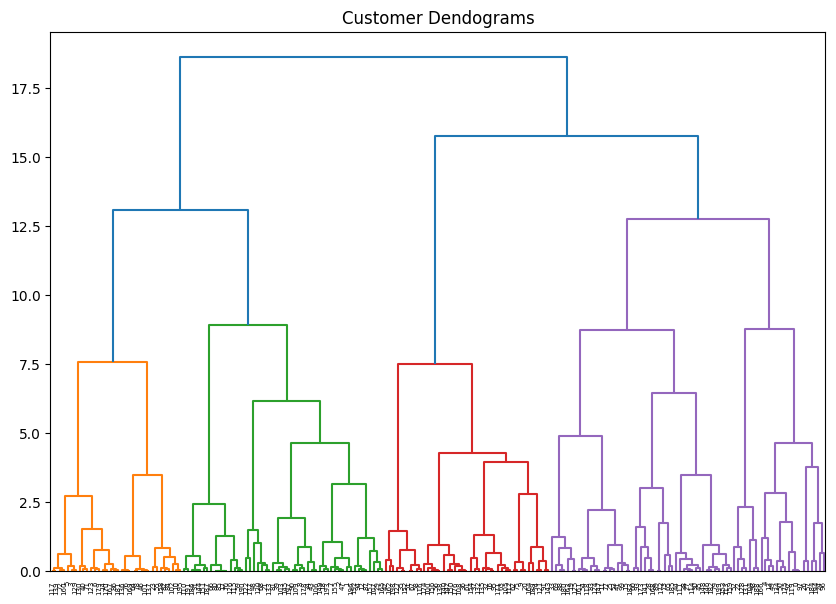

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data_novo, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_novo)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1,
       2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1], dtype=int64)

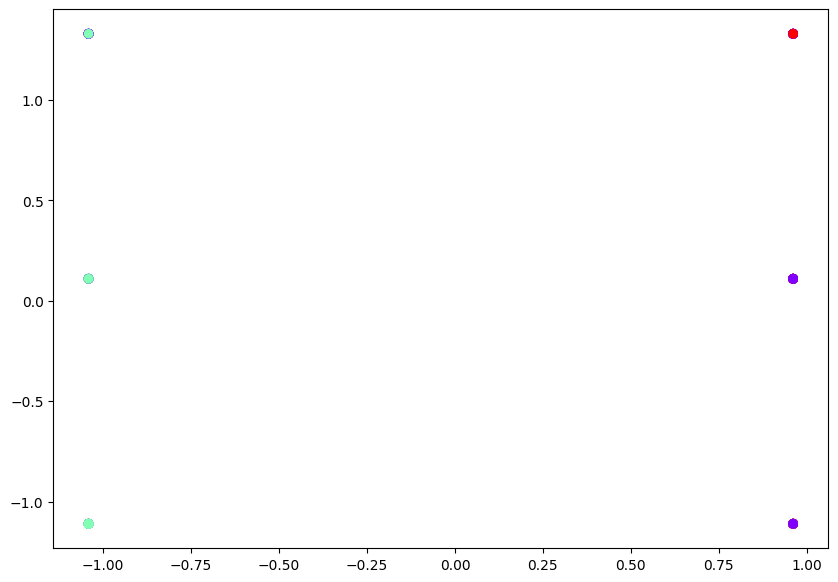

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(data_novo[:,0], data_novo[:,1], c=cluster.labels_, cmap='rainbow')

In [9]:
X = np.array(data.drop(['Drug'], 1).astype(float))
y = np.array(data['Drug'])

C:\Users\luiza\AppData\Local\Temp\ipykernel_13908\2039957498.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Drug'], 1).astype(float))


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[24.88888889  0.44444444  0.82539683  0.47619048 17.05528571]
 [63.828125    0.546875    0.9375      0.40625    16.1015    ]
 [43.97260274  0.56164384  0.95890411  0.56164384 15.23175342]]


In [11]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.165
